# Progetto Analisi di dati

Notebook realizzato per l'esame di "Programmazione e analisi di dati", modulo "Analisi di dati".<br>
Membri del gruppo:
* Roberto Cannarella, 616400
* Francesca E. Marra, 627101
* Lorenza Valentini, 627103

## Traccia del progetto

1. Calcolare statistiche descrittive e relativi grafici per tutte le variabili: per esempio percentuali di uomini e donne, percentuali di sopravvisuti per classe usando grafici a torta, istogrammi, bar chart, box-plot, etc.<br>
2. Calcolare correlazione tra tutte le variabili, usare scatter plot per coppie di variabili con interpolazione lineare, usare pairplot ed heatmaps. Gestire outliers e valori nulli se presenti.<br>
3. Scrivere una relazione di 2500 parole con i risultati dell’analisi

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
%matplotlib inline
import scipy.stats as sp
from scipy.stats import zscore

In [2]:
py.offline.init_notebook_mode(connected=True)

In [3]:
cf.go_offline()

## Prime esplorazioni del dataset 

In [4]:
titanic_data = pd.read_csv("train.csv")

In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Preparazione e pulizia dei dati

### Sostituzioni per leggibilità

In [8]:
# sostituzioni per aumentare la leggibilità e la comprensibilità dei valori

titanic_data['Survived'] = titanic_data['Survived'].replace([0, 1], ['Deceased', 'Survived'])
titanic_data['Embarked'] = titanic_data['Embarked'].replace(["S", "C", "Q"], ['Southampton', 'Cherbourg', 'Queenstown'])
titanic_data['Pclass'] = titanic_data['Pclass'].replace([1, 2, 3], ['First Class', 'Second Class', 'Third Class'])
titanic_data['Sex'] = titanic_data['Sex'].replace(["female", "male"], ["Female", "Male"])

### Aggiunta di una variabile per i membri della famiglia a bordo

In [9]:
# creazione di un'unica variabile a partire da SibSp e Parch

family_members = titanic_data["SibSp"]+titanic_data["Parch"]
titanic_data.insert(8, "FamMembers", family_members)

### Gestione NaN
Variabili con valori NaN:
* Age
* Cabin
* Embarked

In [10]:
# individuazione dei valori nulli

print('Valori nulli di Cabin:', titanic_data['Cabin'].isna().sum())
print('Valori nulli di Embarked:', titanic_data['Embarked'].isna().sum())
print('Valori nulli di Age:',titanic_data['Age'].isna().sum())

Valori nulli di Cabin: 687
Valori nulli di Embarked: 2
Valori nulli di Age: 177


In [11]:
# df principale (senza cabina), ma con i NaN
titanic_nc = titanic_data.drop('Cabin', axis = 1)
titanic_nc.shape

(891, 12)

In [12]:
# df principale (senza cabina) pulito, quindi senza NaN in Age ed Embarked
titanic_nc_clean = titanic_nc.dropna(subset=['Age', 'Embarked'])
titanic_nc_clean.shape

(712, 12)

In [13]:
# pochi dati ma con le cabine --> DA USARE SOLO PER STATISTICHE CHE RIGUARDANO LE CABINE
titanic_cabins = titanic_data.dropna(subset=['Age', 'Cabin', 'Embarked'])
titanic_cabins.shape

(183, 13)

# 1. Statistica descrittiva e visualizzazione grafica

### Parametri grafici

In [14]:
# parametri grafici globali

colors = ['#abde95','#95dbde', '#e39fcc']
plt.rcParams["figure.figsize"] = [12,9]
sns.set_context("notebook", font_scale=1.3, rc={"font.size":13,"axes.titlesize":16,"axes.labelsize":13})
sns.set_style("dark")

### Percentuale dei sopravvissuti

In [15]:
# confronto numerico

titanic_nc_clean['Survived'].value_counts()

Deceased    424
Survived    288
Name: Survived, dtype: int64

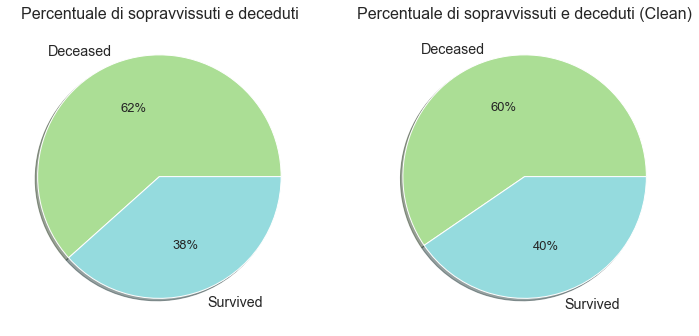

In [16]:
# confronto percentuali via pie chart

plt.subplot(1,2,1)
plt.title("Percentuale di sopravvissuti e deceduti")
sopravvissuti = titanic_nc['Survived']
sopravvissuti.value_counts().plot(kind='pie', shadow = True, colors = colors, autopct = "%1.0f%%")
plt.ylabel("")

plt.subplot(1,2,2)
plt.title("Percentuale di sopravvissuti e deceduti (Clean)")
sopravvissuti2 = titanic_nc_clean['Survived']
sopravvissuti2.value_counts().plot(kind='pie', shadow = True, colors = colors, autopct = "%1.0f%%")
plt.ylabel("")

plt.show()

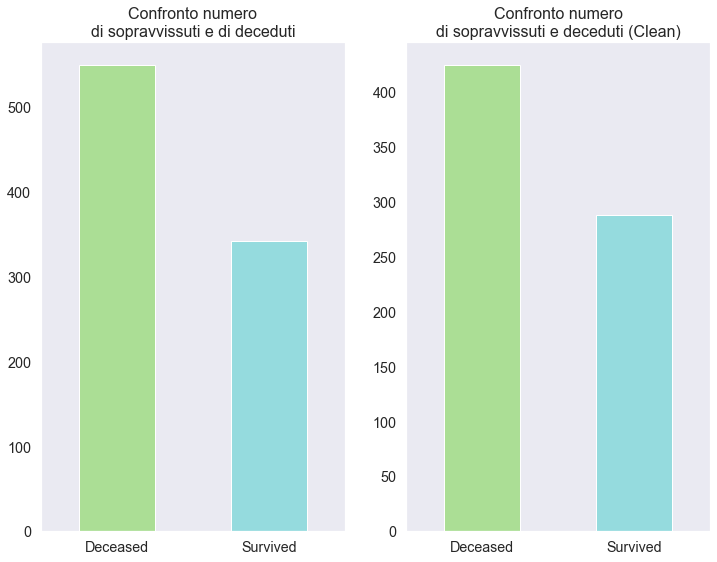

In [17]:
# confronto attraverso barplot

plt.subplot(1,2,1)
plt.title("Confronto numero\ndi sopravvissuti e di deceduti")
sopravvissuti = titanic_nc['Survived']
sopravvissuti.value_counts().plot.bar(color = colors)
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title("Confronto numero\ndi sopravvissuti e deceduti (Clean)")
sopravvissuti2 = titanic_nc_clean['Survived']
sopravvissuti2.value_counts().plot.bar(color = colors)
plt.xticks(rotation=0)

plt.show()

### Percentuale di membri per classe

In [18]:
# confronto numerico

titanic_nc_clean['Pclass'].value_counts()

Third Class     355
First Class     184
Second Class    173
Name: Pclass, dtype: int64

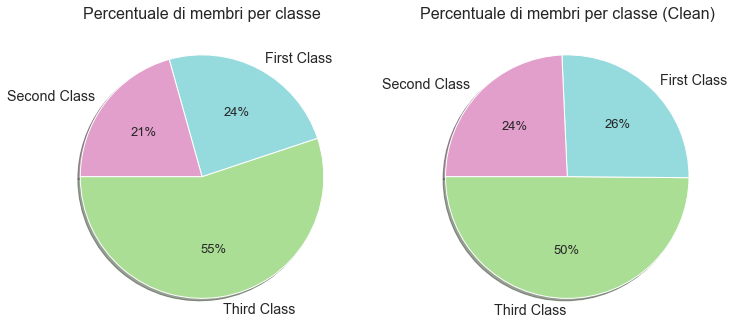

In [19]:
plt.subplot(1,2,1)
plt.title("Percentuale di membri per classe")
classi = titanic_nc['Pclass']
classi.value_counts().plot(kind='pie', shadow = True, colors = colors, autopct = "%1.0f%%", startangle=180)
plt.ylabel("")

plt.subplot(1,2,2)
plt.title("Percentuale di membri per classe (Clean)")
classi2 = titanic_nc_clean['Pclass']
classi2.value_counts().plot(kind='pie', shadow = True, colors = colors, autopct = "%1.0f%%", startangle=180)
plt.ylabel("")

plt.show()

### Percentuale di membri per sesso

In [20]:
titanic_nc_clean['Sex'].value_counts()

Male      453
Female    259
Name: Sex, dtype: int64

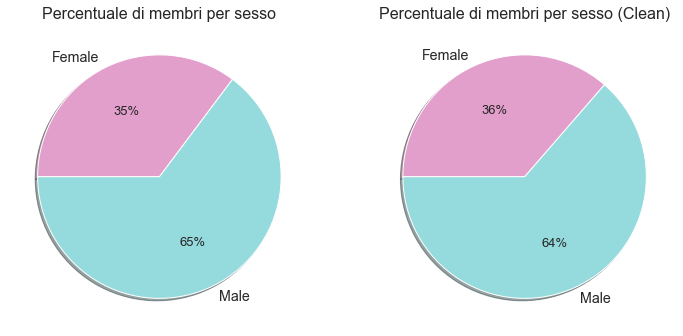

In [21]:
plt.subplot(1,2,1)
plt.title("Percentuale di membri per sesso")
sesso = titanic_nc['Sex']
sesso.value_counts().plot(kind='pie', shadow = True, colors = [colors[1],colors[2]], autopct = "%1.0f%%", startangle=180)
plt.ylabel("")

plt.subplot(1,2,2)
plt.title("Percentuale di membri per sesso (Clean)")
sesso2 = titanic_nc_clean['Sex']
sesso2.value_counts().plot(kind='pie', shadow = True, colors = [colors[1],colors[2]], autopct = "%1.0f%%", startangle=180)
plt.ylabel("")

plt.show()

### Statistiche sulle cabine

In [22]:
titanic_cabins['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
              ..
C87            1
E40            1
D15            1
E10            1
A20            1
Name: Cabin, Length: 133, dtype: int64

In [23]:
cabinsFreq = titanic_cabins['Cabin'].value_counts()

#uso il metodo index per memorizzare l'indice associate alle frequenze
values = cabinsFreq[cabinsFreq > 1].index

#costruisco un sotto-df con solo le cabine con freq > 1
titanic_cabins_filtered = titanic_cabins[titanic_cabins['Cabin'].isin(values)]

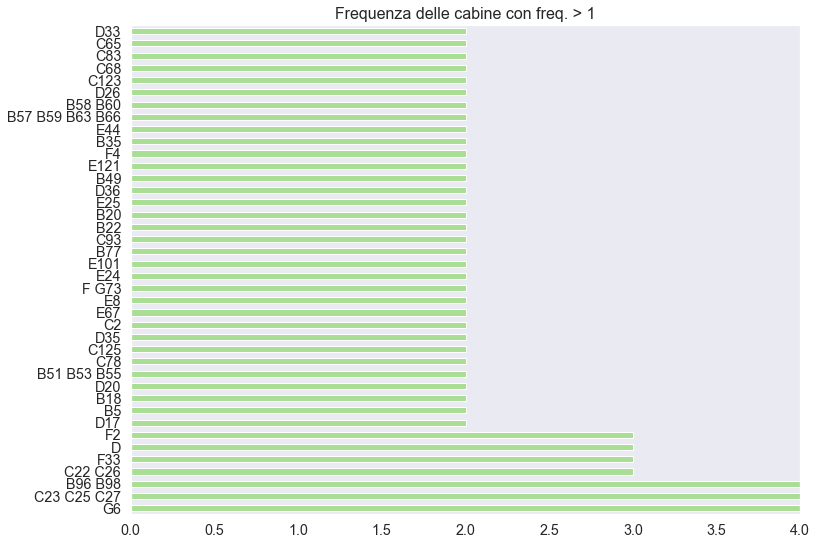

In [24]:
# costruzione di un barplot orizontale

plt.title("Frequenza delle cabine con freq. > 1")
cabine = titanic_cabins_filtered['Cabin']
cabine.value_counts().plot(kind='barh', color="#abde95")
plt.xlim(right=4)

plt.show()

### Percentuale dei porti di partenza

In [25]:
titanic_nc_clean['Embarked'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64

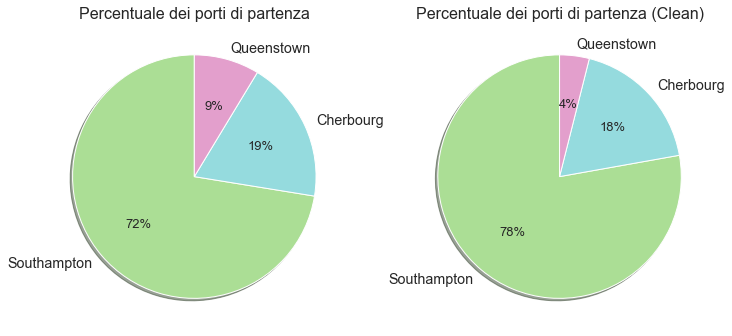

In [26]:
plt.subplot(1,2,1)
plt.title("Percentuale dei porti di partenza")
porti = titanic_nc['Embarked']
porti.value_counts().plot(kind='pie', shadow = True, colors = colors, autopct = "%1.0f%%", startangle=90)
plt.ylabel("")

plt.subplot(1,2,2)
plt.title("Percentuale dei porti di partenza (Clean)")
porti = titanic_nc_clean['Embarked']
porti.value_counts().plot(kind='pie', shadow = True, colors = colors, autopct = "%1.0f%%", startangle=90)
plt.ylabel("")


plt.show()

### Statistiche età

In [27]:
titanic_nc_clean.value_counts("Age")

Age
24.00    30
22.00    27
18.00    26
30.00    25
19.00    25
         ..
53.00     1
55.50     1
66.00     1
70.50     1
0.42      1
Length: 88, dtype: int64

#### Boxplot per visualizzazione degli outliers

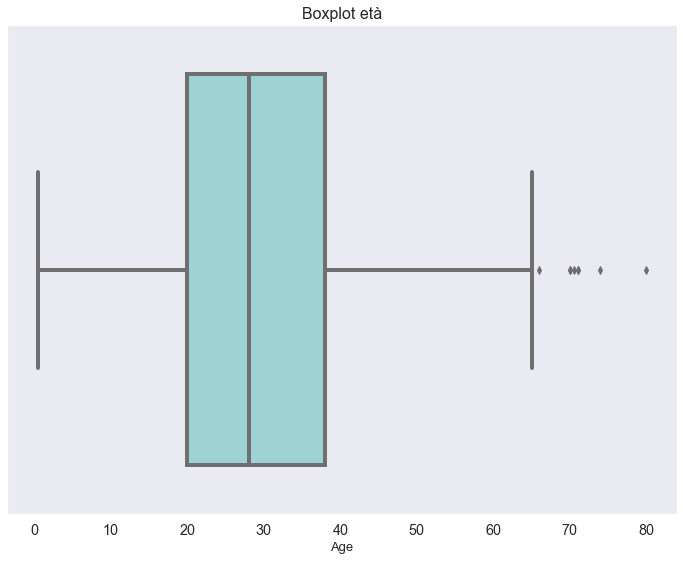

In [28]:
# boxplot per osservazione della distribuzione e degli outliers

sns.boxplot(x='Age', data=titanic_nc_clean, color=colors[1], linewidth=4) 
plt.title("Boxplot età")
plt.xticks(rotation=0)
plt.show()

In [29]:
# individuazione outliers e definizione della distribuzione senza outliers

Q1_Age = titanic_data['Age'].quantile(0.25, interpolation='linear')
Q3_Age = titanic_data['Age'].quantile(0.75, interpolation='linear')
IQR_Age = Q3_Age-Q1_Age
LowerfenceAge = Q1_Age - 1.5*IQR_Age
UpperfenceAge = Q3_Age + 1.5*IQR_Age
OUTLIERS_Age = titanic_data.loc[(titanic_data['Age'] < LowerfenceAge)  |  (titanic_data['Age'] > UpperfenceAge) ]
NORMAL_Age = titanic_data.loc[(titanic_data['Age'] > LowerfenceAge)  & (titanic_data['Age'] < UpperfenceAge) ]

In [30]:
print(IQR_Age)

17.875


In [31]:
# valore max con outliers

OUTLIERS_Age["Age"].max()

80.0

In [32]:
# valore max senza outliers

NORMAL_Age["Age"].max()

64.0

In [33]:
OUTLIERS_Age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamMembers,Ticket,Fare,Cabin,Embarked
33,34,Deceased,Second Class,"Wheadon, Mr. Edward H",Male,66.0,0,0,0,C.A. 24579,10.5000,NaN,Southampton
54,55,Deceased,First Class,"Ostby, Mr. Engelhart Cornelius",Male,65.0,0,1,1,113509,61.9792,B30,Cherbourg
96,97,Deceased,First Class,"Goldschmidt, Mr. George B",Male,71.0,0,0,0,PC 17754,34.6542,A5,Cherbourg
116,117,Deceased,Third Class,"Connors, Mr. Patrick",Male,70.5,0,0,0,370369,7.7500,NaN,Queenstown
280,281,Deceased,Third Class,"Duane, Mr. Frank",Male,65.0,0,0,0,336439,7.7500,NaN,Queenstown


#### Confronto distribuzione età con e senza outliers

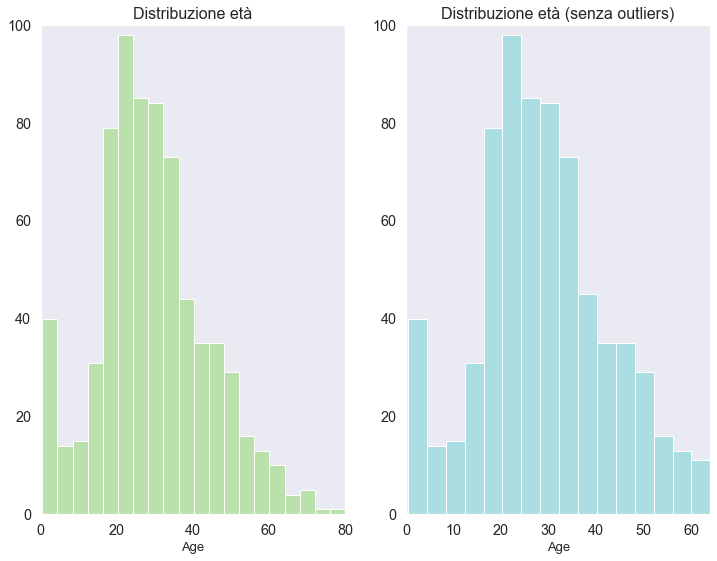

In [34]:
plt.subplot(1,2,1)
sns.histplot(titanic_nc_clean['Age'],kde=False,color=colors[0])
plt.title("Distribuzione età")
plt.xlabel("Age")
plt.ylabel("")
plt.xlim(left=0,right=80)
plt.ylim(top=100)

plt.subplot(1,2,2)
sns.histplot(NORMAL_Age['Age'],kde=False,color=colors[1])
sns.set_style("darkgrid")
plt.title("Distribuzione età (senza outliers)")
plt.xlabel("Age")
plt.ylabel("")
plt.xlim(left=0, right=64)
plt.ylim(top=100)

plt.show()

### Statistiche membri della famiglia a bordo

In [35]:
titanic_nc_clean.value_counts("FamMembers")

FamMembers
0    402
1    139
2     93
3     27
5     22
6     12
4     11
7      6
dtype: int64

#### Boxplot per visualizzazione degli outliers

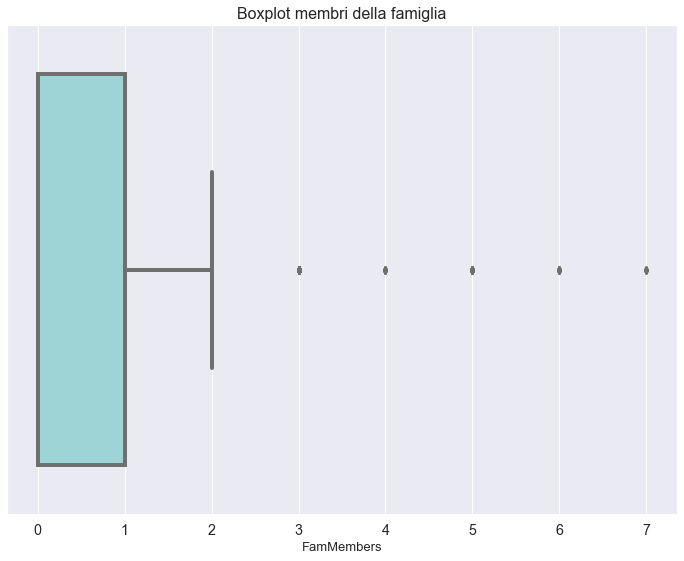

In [36]:
sns.boxplot(x='FamMembers', data=titanic_nc_clean, color=colors[1], linewidth=4) 
plt.title("Boxplot membri della famiglia")
plt.xticks(rotation=0)
plt.show()

In [37]:
Q1_FamMembers = titanic_data['FamMembers'].quantile(0.25, interpolation='linear')
Q3_FamMembers = titanic_data['FamMembers'].quantile(0.75, interpolation='linear')
IQR_FamMembers = Q3_FamMembers-Q1_FamMembers
LowerfenceFamMembers = Q1_FamMembers - 1.5*IQR_FamMembers
UpperfenceFamMembers = Q3_FamMembers + 1.5*IQR_FamMembers
OUTLIERS_FamMembers = titanic_data.loc[(titanic_data['Fare'] < LowerfenceFamMembers)  |  (titanic_data['Fare'] > UpperfenceFamMembers)]
NORMAL_FamMembers = titanic_data.loc[(titanic_data['FamMembers'] > LowerfenceFamMembers)  & (titanic_data['FamMembers'] < UpperfenceFamMembers)]

In [38]:
print(IQR_FamMembers)

1.0


In [39]:
OUTLIERS_FamMembers["FamMembers"].max()

10

In [40]:
NORMAL_FamMembers["FamMembers"].max()

2

In [41]:
NORMAL_FamMembers.value_counts('FamMembers')

FamMembers
0    537
1    161
2    102
dtype: int64

In [42]:
OUTLIERS_FamMembers.value_counts('FamMembers')

FamMembers
0     522
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

#### Confronto numero membri famiglia con e senza outliers

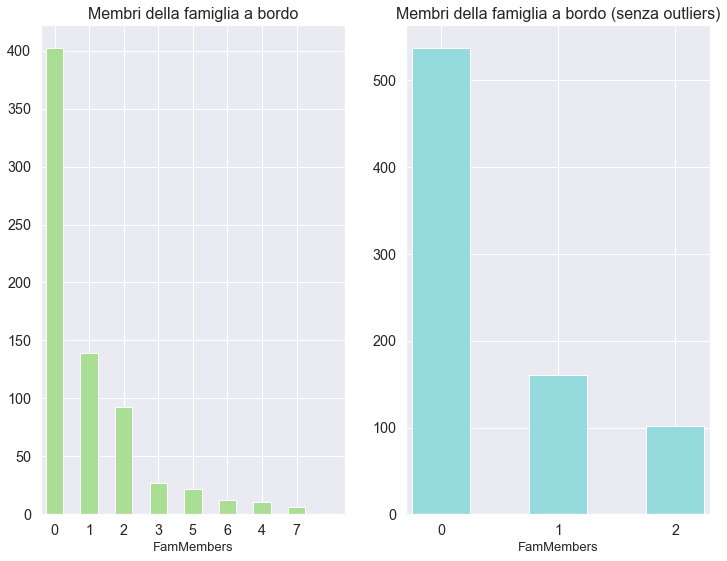

In [43]:
plt.subplot(1,2,1)
plt.title("Membri della famiglia a bordo")
titanic_nc_clean.value_counts("FamMembers").plot.bar(color=colors[0])
plt.xticks(rotation=0)
plt.xlim(left=-0.4, right=8.4)

plt.subplot(1,2,2)
plt.title("Membri della famiglia a bordo (senza outliers)")
NORMAL_FamMembers.value_counts("FamMembers").plot.bar(color=colors[1])
plt.xticks(rotation=0)
plt.xlim(left=-0.3, right=2.3)

plt.show()

### Statistiche costo del biglietto

#### Boxplot per visualizzazione degli outliers

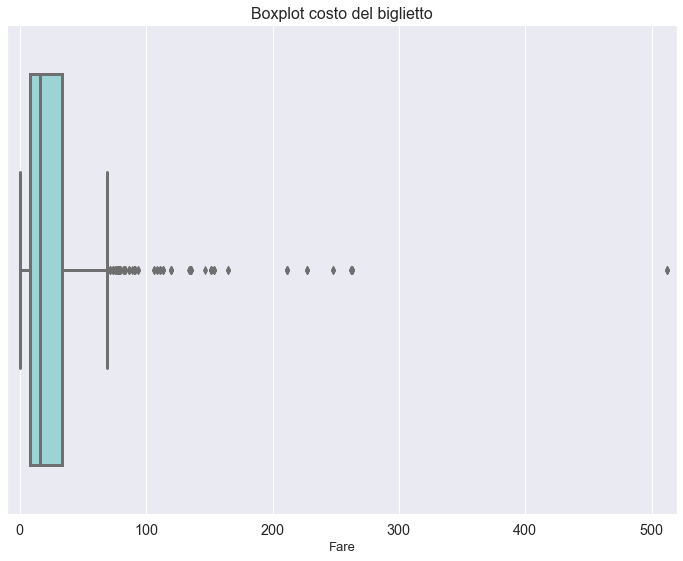

In [44]:
sns.boxplot(x='Fare', data=titanic_nc_clean, color=colors[1], linewidth=3) 
plt.title("Boxplot costo del biglietto")
plt.xticks(rotation=0)
plt.xlim(left=-10, right=520)
plt.show()

In [45]:
Q1_Fare = titanic_data['Fare'].quantile(0.25, interpolation='linear')
Q3_Fare = titanic_data['Fare'].quantile(0.75, interpolation='linear')
IQR_Fare = Q3_Fare-Q1_Fare
LowerfenceFare = Q1_Fare - 1.5*IQR_Fare
UpperfenceFare = Q3_Fare + 1.5*IQR_Fare
OUTLIERS_Fare = titanic_data.loc[(titanic_data['Fare'] < LowerfenceFare)  |  (titanic_data['Fare'] > UpperfenceFare) ]
NORMAL_Fare = titanic_data.loc[(titanic_data['Fare'] > LowerfenceFare)  & (titanic_data['Fare'] < UpperfenceFare) ]

In [46]:
print(IQR_Fare)

23.0896


In [47]:
OUTLIERS_Fare["Fare"].max()

512.3292

In [48]:
NORMAL_Fare["Fare"].max()

65.0

In [49]:
OUTLIERS_Fare.value_counts('Fare')

Fare
69.5500     7
73.5000     5
90.0000     4
120.0000    4
227.5250    4
79.2000     4
151.5500    4
263.0000    4
110.8833    4
76.7292     3
77.9583     3
79.6500     3
83.1583     3
86.5000     3
113.2750    3
512.3292    3
135.6333    3
153.4625    3
211.3375    3
133.6500    2
80.0000     2
69.3000     2
262.3750    2
71.0000     2
247.5208    2
77.2875     2
78.2667     2
78.8500     2
134.5000    2
164.8667    2
82.1708     2
83.4750     2
146.5208    2
89.1042     2
91.0792     2
93.5000     2
106.4250    2
108.9000    2
66.6000     2
81.8583     1
211.5000    1
221.7792    1
76.2917     1
75.2500     1
71.2833     1
dtype: int64

In [50]:
NORMAL_Fare.value_counts('Fare')

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
14.0000     1
14.1083     1
50.0000     1
15.0000     1
12.6500     1
Length: 203, dtype: int64

#### Confronto costo del biglietto con e senza outliers

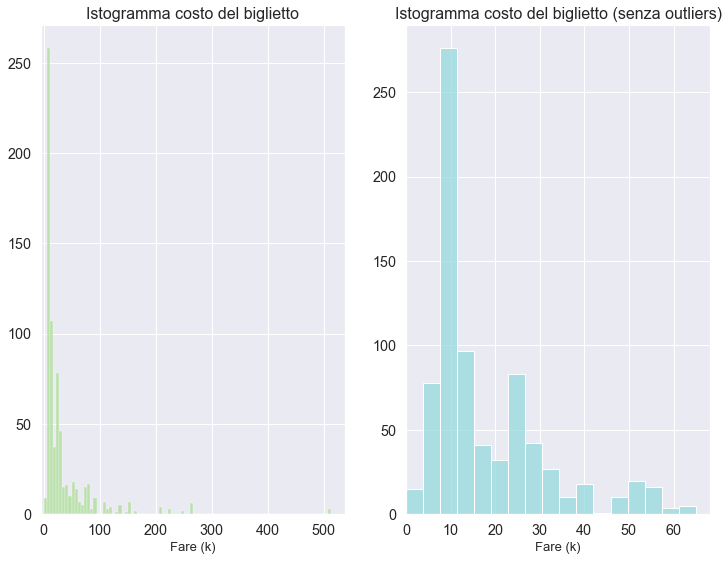

In [51]:
plt.subplot(1,2,1)
sns.histplot(titanic_nc_clean['Fare'],kde=False, color=colors[0])
sns.set_style("darkgrid")
plt.title("Istogramma costo del biglietto")
plt.xlabel("Fare (k)")
plt.ylabel("")
plt.xlim(left=-5)

plt.subplot(1,2,2)
sns.histplot(NORMAL_Fare['Fare'],kde=False, color=colors[1])
sns.set_style("darkgrid")
plt.title("Istogramma costo del biglietto (senza outliers)")
plt.xlabel("Fare (k)")
plt.ylabel("")
plt.xlim(left=0)

plt.show()

## Indici di tendenza centrale per le variabili numeriche: Fare, Age, FamMembers (Sibsp + Parch)

### Media (Mean)


$$
\frac {1}{n}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}
$$

In [52]:
Mean = titanic_data['Age'].mean()
print("[AGE] La media è: ", round(Mean,2))
Mean = NORMAL_Age['Age'].mean()
print("[AGE - senza outliers] La media è: ", round(Mean,2))
print("")
Mean = titanic_data['Fare'].mean()
print("[FARE] La media è: ", round(Mean,2))
Mean = NORMAL_Fare['Fare'].mean()
print("[FARE - senza outliers] La media è: ", round(Mean,2))
print("")
Mean = titanic_data['FamMembers'].mean()
print("[FamMembers] La media è: ", round(Mean,2))
Mean = NORMAL_FamMembers['FamMembers'].mean()
print("[FamMembers - senza outliers] La media è: ", round(Mean,2))


[AGE] La media è:  29.7
[AGE - senza outliers] La media è:  29.07

[FARE] La media è:  32.2
[FARE - senza outliers] La media è:  17.82

[FamMembers] La media è:  0.9
[FamMembers - senza outliers] La media è:  0.46


### Standard Error of the Mean (SEM) - errore standard della media

$$
SEM = \frac{S}{\sqrt(N)}
$$

In [53]:
SEM_Age = titanic_nc_clean['Age'].sem()
print("[AGE] L'errore standard della media è: ", SEM_Age)
print("")

SEM_Fare = titanic_nc_clean['Fare'].sem()
print("[FARE] L'errore standard della media è: ", SEM_Fare)
print("")

SEM_FamMembers = titanic_nc_clean['FamMembers'].sem()
print("[FamMembers] L'errore standard della media è: ", SEM_FamMembers) 

[AGE] L'errore standard della media è:  0.5431456237641589

[FARE] L'errore standard della media è:  1.9839597189774363

[FamMembers] L'errore standard della media è:  0.055653738347157596


### Mediana (Median)

In [54]:
Median = titanic_data['Age'].median()
print("[AGE] La mediana è: ", round(Median,2)) 
Median = NORMAL_Age['Age'].median()
print("[AGE- senza outliers] La mediana è: ", round(Median,2))
print("")

Median = titanic_data['Fare'].median()
print("[FARE] La mediana è: ", round(Median,2)) 
Median = NORMAL_Fare['Fare'].median()
print("[FARE - senza outliers] La mediana è: ", round(Median,2))
print("")

Median = titanic_data['FamMembers'].median()
print("[FamMembers] La mediana è: ", round(Median,2)) 
Median = NORMAL_FamMembers['FamMembers'].median()
print("[FamMembers - senza outliers] La mediana è: ", round(Median,2)) 

[AGE] La mediana è:  28.0
[AGE- senza outliers] La mediana è:  28.0

[FARE] La mediana è:  14.45
[FARE - senza outliers] La mediana è:  13.0

[FamMembers] La mediana è:  0.0
[FamMembers - senza outliers] La mediana è:  0.0


## Indici di dispersione

### Scarto dalla media (Mean Absolute Deviation, MAD)

$$
\,\frac{\sum{{|{x}_{i}}-\overline{x}}|}{n}
$$

In [55]:
Mad  = titanic_data['Age'].mad()
print("[AGE] Lo scarto dalla media (MAD value) è: ", round(Mad,2))
Mad  = NORMAL_Age['Age'].mad()
print("[AGE - senza outliers] Lo scarto dalla media (MAD value) è: ", round(Mad,2))
print("")

Mad  = titanic_data['Fare'].mad()
print("[FARE] Lo scarto dalla media (MAD value) è: ", round(Mad,2))
Mad  = NORMAL_Fare['Fare'].mad()
print("[FARE - senza outliers] Lo scarto dalla media (MAD value) è: ", round(Mad,2))
print("")
Mad  = titanic_data['FamMembers'].mad()
print("[FamMembers] Lo scarto dalla media (MAD value) è: ", round(Mad,2))
Mad  = NORMAL_FamMembers['FamMembers'].mad()
print("[FamMembers - senza outliers] Lo scarto dalla media (MAD value) è: ", round(Mad,2))

[AGE] Lo scarto dalla media (MAD value) è:  11.32
[AGE - senza outliers] Lo scarto dalla media (MAD value) è:  10.82

[FARE] Lo scarto dalla media (MAD value) è:  28.16
[FARE - senza outliers] Lo scarto dalla media (MAD value) è:  10.81

[FamMembers] Lo scarto dalla media (MAD value) è:  1.09
[FamMembers - senza outliers] Lo scarto dalla media (MAD value) è:  0.61


### Varianza del campione e della popolazione

Varianza del campione:
$$
\sigma^2=\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n-1}
$$

Varianza della popolazione:
$$
\sigma^2=\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}
$$

In [56]:
VAR = titanic_data['Age'].var()
print("[AGE] La varianza del campione è: ", round(VAR,2))
VAR = NORMAL_Age['Age'].var()
print("[AGE - senza outliers] La varianza del campione è: ", round(VAR,2))
print("")
VAR = titanic_data['Fare'].var()
print("[FARE] La varianza del campione è: ", round(VAR,2))
VAR = NORMAL_Fare['Fare'].var()
print("[FARE - senza outliers] La varianza del campione è: ", round(VAR,2))
print("")
VAR = titanic_data['FamMembers'].var()
print("[FamMembers] La varianza del campione è: ", round(VAR,2))
VAR = NORMAL_FamMembers['FamMembers'].var()
print("[FamMembers - senza outliers] La varianza del campione è: ", round(VAR,2))
print("")

pVAR = titanic_data['Age'].var(ddof=0)
print("[AGE] La varianza della popolazione è: ", round(pVAR,2))
pVAR = NORMAL_Age['Age'].var(ddof=0)
print("[AGE - senza outliers] La varianza della popolazione è: ", round(pVAR,2))
print("")
pVAR = titanic_data['Fare'].var(ddof=0)
print("[FARE] La varianza della popolazione è: ", round(pVAR,2))
pVAR = NORMAL_Fare['Fare'].var(ddof=0)
print("[FARE - senza outliers] La varianza della popolazione è: ", round(pVAR,2))
print("")
pVAR = titanic_data['FamMembers'].var(ddof=0)
print("[FamMembers] TLa varianza della popolazione è: ", round(pVAR,2))
pVAR = NORMAL_FamMembers['FamMembers'].var(ddof=0)
print("[FamMembers - senza outliers] La varianza della popolazione è: ", round(pVAR,2))

[AGE] La varianza del campione è:  211.02
[AGE - senza outliers] La varianza del campione è:  188.47

[FARE] La varianza del campione è:  2469.44
[FARE - senza outliers] La varianza del campione è:  184.36

[FamMembers] La varianza del campione è:  2.6
[FamMembers - senza outliers] La varianza del campione è:  0.5

[AGE] La varianza della popolazione è:  210.72
[AGE - senza outliers] La varianza della popolazione è:  188.2

[FARE] La varianza della popolazione è:  2466.67
[FARE - senza outliers] La varianza della popolazione è:  184.13

[FamMembers] TLa varianza della popolazione è:  2.6
[FamMembers - senza outliers] La varianza della popolazione è:  0.5


### Deviazione standard del campione e della popolazione

Deviazione standard del campione:
$$
\sigma = \sqrt\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n-1}
$$

Deviazione standard della popolazione:
$$
\sigma = \sqrt\frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}
$$

In [57]:
STD = titanic_data['Age'].std()
print("[AGE] La deviazione standard del campione è: ", round(STD,2))
STD = NORMAL_Age['Age'].std()
print("[AGE - senza outliers] La deviazione standard del campione è: ", round(STD,2))
print("")

STD = titanic_data['Fare'].std()
print("[FARE] La deviazione standard del campione è: ", round(STD,2))
STD = NORMAL_Fare['Fare'].std()
print("[FARE - senza outliers] La deviazione standard del campione è:  ", round(STD,2))
print("")

STD = titanic_data['FamMembers'].std()
print("[FamMembers] La deviazione standard del campione è: ", round(STD,2))
STD = NORMAL_FamMembers['FamMembers'].std()
print("[FamMembers - senza outliers] La deviazione standard del campione è: ", round(STD,2))
print("")

pSTD = titanic_data['Age'].std()
print("[AGE] La deviazione standard della popolazione è: ", round(pSTD,2))
pSTD = NORMAL_Age['Age'].std()
print("[AGE - senza outliers] La deviazione standard della popolazione è: ", round(pSTD,2))
print("")

pSTD = titanic_data['Fare'].std()
print("[FARE] La deviazione standard della popolazione è: ", round(pSTD,2))
pSTD = NORMAL_Fare['Fare'].std(ddof=0)
print("[FARE - senza outliers] La deviazione standard della popolazione è: ", round(pSTD,2))
print("")

pSTD = titanic_data['FamMembers'].std()
print("[FamMembers] La deviazione standard della popolazione è: ", round(pSTD,2))
pSTD = NORMAL_FamMembers['FamMembers'].std(ddof=0)
print("[FamMembers - senza outliers] La deviazione standard della popolazione è: ", round(pSTD,2))

[AGE] La deviazione standard del campione è:  14.53
[AGE - senza outliers] La deviazione standard del campione è:  13.73

[FARE] La deviazione standard del campione è:  49.69
[FARE - senza outliers] La deviazione standard del campione è:   13.58

[FamMembers] La deviazione standard del campione è:  1.61
[FamMembers - senza outliers] La deviazione standard del campione è:  0.71

[AGE] La deviazione standard della popolazione è:  14.53
[AGE - senza outliers] La deviazione standard della popolazione è:  13.73

[FARE] La deviazione standard della popolazione è:  49.69
[FARE - senza outliers] La deviazione standard della popolazione è:  13.57

[FamMembers] La deviazione standard della popolazione è:  1.61
[FamMembers - senza outliers] La deviazione standard della popolazione è:  0.71


## Z-scores

$$
Z=\frac{x-\overline{x}}{s}
$$

In [58]:
# i valori z permettono di visualizzare 'quante volte la deviazione standard' i singoli valori sono lontani dalla media

ages_zscores = sp.zscore(titanic_nc_clean['Age']).round(2)
titanic_nc_clean.insert(6, "Age (Z)", ages_zscores, True)

famMembers_zscores = sp.zscore(titanic_nc_clean['FamMembers']).round(2)
titanic_nc_clean.insert(10, "FamMembers (Z)", famMembers_zscores, True)

fare_zscores = sp.zscore(titanic_nc_clean['Fare']).round(2)
titanic_nc_clean.insert(13, "Fare (Z)", fare_zscores, True)

titanic_nc_clean.head()

### Percentuale di sopravvissuti in base alla classe di viaggio

In [59]:
# creazione di un df apposito: metodo usato anche per i df a seguire

# creazione di un sotto-df con solo i vivi
morti = titanic_nc.loc[titanic_nc['Survived'].isin(["Deceased"])]
# raggruppamento e counting dei morti in base alla classe
raggrupMorti = morti.groupby(['Pclass'])['Survived']
dfRagMorti = raggrupMorti.aggregate(['count'])

vivi = titanic_nc.loc[titanic_nc['Survived'].isin(["Survived"])]
raggrupVivi = vivi.groupby(['Pclass'])['Survived']
dfRagVivi = raggrupVivi.aggregate(['count'])

# modifica del df per chiarezza
dfRagMorti = dfRagMorti.rename(columns = {'count': 'Deceduti'})
dfRagMorti.insert(0, "Class", ["First Class", "Second Class", "Third Class"])

dfRagVivi = dfRagVivi.rename(columns = {'count': 'Sopravvissuti'})
dfRagVivi.insert(0, "Class", ["First Class", "Second Class", "Third Class"])

# unione dei due sotto-df usando Class come key per il merge
dfSopravvissuti = pd.merge(dfRagVivi, dfRagMorti, on="Class")
dfSopravvissuti.head()

,Class,Sopravvissuti,Deceduti
0,First Class,136,80
1,Second Class,87,97
2,Third Class,119,372


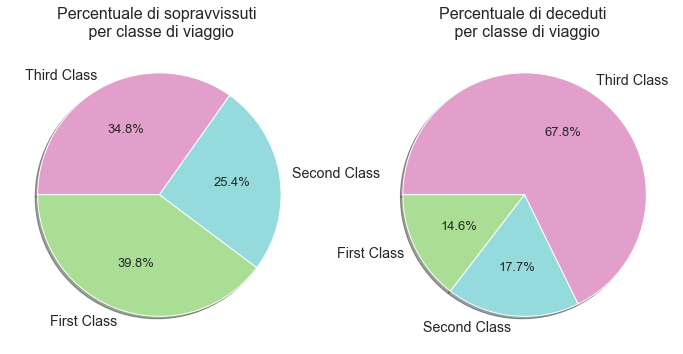

In [60]:
plt.subplot(1,2,1)
plt.title("Percentuale di sopravvissuti \n per classe di viaggio")
sizes = dfSopravvissuti['Sopravvissuti']
labels = dfSopravvissuti['Class']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors=colors)

plt.subplot(1,2,2)
plt.title("Percentuale di deceduti \n per classe di viaggio")
sizes = dfSopravvissuti['Deceduti']
labels = dfSopravvissuti['Class']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)


plt.show()

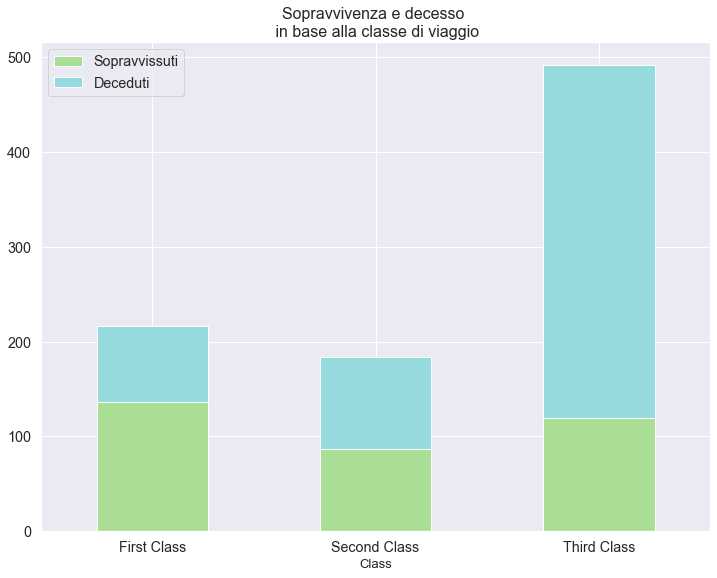

In [61]:
dfSopravvissuti.plot(kind="bar", x="Class", stacked=True,rot=0, color=colors)
plt.title("Sopravvivenza e decesso \n in base alla classe di viaggio")


plt.show()

### Percentuale di sopravvissuti in base alla cabina

In [62]:
mortiC = titanic_cabins_filtered.loc[titanic_cabins_filtered['Survived'].isin(["Deceased"])]
viviC = titanic_cabins_filtered.loc[titanic_cabins_filtered['Survived'].isin(["Survived"])]

raggrupMortiCabina = mortiC.groupby(['Cabin'])['Survived']
dfRagMortiCabina = raggrupMortiCabina.aggregate(['count'])

raggrupViviCabina = viviC.groupby(['Cabin'])['Survived']
dfRagViviCabina = raggrupViviCabina.aggregate(['count'])

dfRagMortiCabina = dfRagMortiCabina.rename(columns = {'count': 'Deceduti'})

dfRagViviCabina = dfRagViviCabina.rename(columns = {'count': 'Sopravvissuti'})

dfSopravvissutiCabina = pd.merge(dfRagViviCabina, dfRagMortiCabina, on="Cabin")
dfSopravvissutiCabina = dfSopravvissutiCabina.reset_index(level='Cabin')

In [63]:
dfSopravvissutiCabina.head(30)

,Cabin,Sopravvissuti,Deceduti
0,B22,1,1
1,B51 B53 B55,1,1
2,B58 B60,1,1
3,C123,1,1
4,C2,1,1
5,C22 C26,1,2
6,C23 C25 C27,2,2
7,C65,1,1
8,C68,1,1
9,C78,1,1


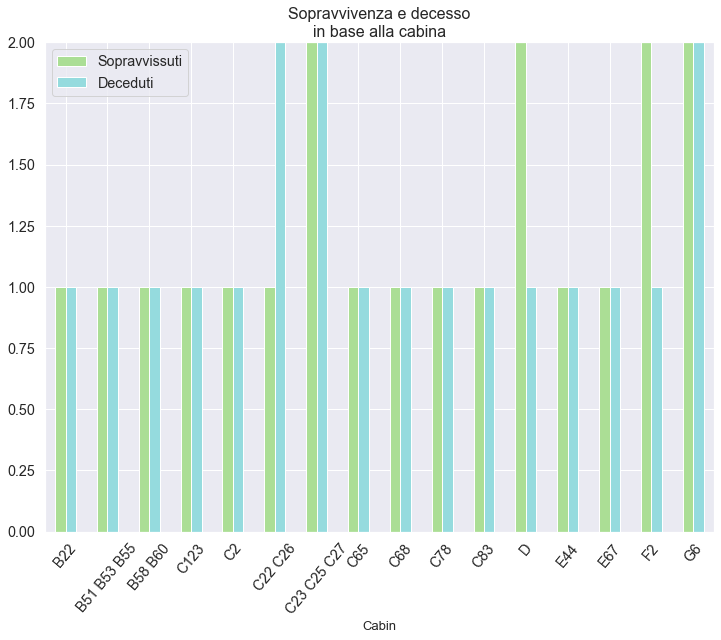

In [64]:
dfSopravvissutiCabina.plot(kind="bar",x="Cabin", rot=50, color = colors)
plt.title("Sopravvivenza e decesso\nin base alla cabina")
plt.ylim(top=2)

plt.show()

### Percentuale di sopravvissuti in base al porto di imbarcazione

In [65]:
raggrupMortiPorto = morti.groupby(['Embarked'])['Survived']
dfRagMortiPorto = raggrupMortiPorto.aggregate(['count'])

raggrupViviPorto = vivi.groupby(['Embarked'])['Survived']
dfRagViviPorto = raggrupViviPorto.aggregate(['count'])

dfRagMortiPorto = dfRagMortiPorto.rename(columns = {'count': 'Deceduti'})
dfRagMortiPorto.insert(0, "Porto di imbarcazione", ['Cherbourg', 'Queenstown', 'Southampton'])

dfRagViviPorto = dfRagViviPorto.rename(columns = {'count': 'Sopravvissuti'})
dfRagViviPorto.insert(0, "Porto di imbarcazione", ['Cherbourg', 'Queenstown', 'Southampton'])

dfSopravvissutiPorto = pd.merge(dfRagViviPorto, dfRagMortiPorto, on="Porto di imbarcazione")
dfSopravvissutiPorto.head()

,Porto di imbarcazione,Sopravvissuti,Deceduti
0,Cherbourg,93,75
1,Queenstown,30,47
2,Southampton,217,427


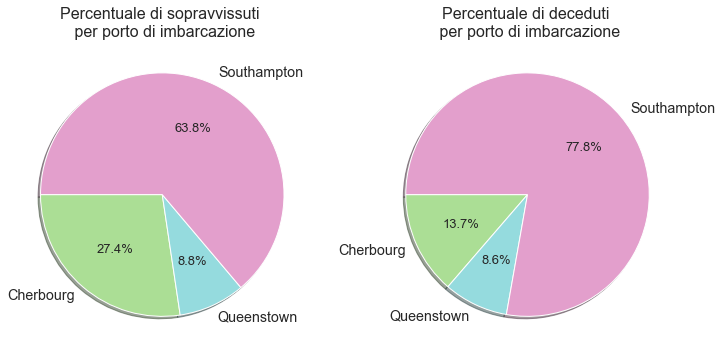

In [66]:
plt.subplot(1,2,1)
plt.title("Percentuale di sopravvissuti \n per porto di imbarcazione")
sizes = dfSopravvissutiPorto['Sopravvissuti']
labels = dfSopravvissutiPorto['Porto di imbarcazione']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)

plt.subplot(1,2,2)
plt.title("Percentuale di deceduti \n per porto di imbarcazione")
sizes = dfSopravvissutiPorto['Deceduti']
labels = dfSopravvissutiPorto['Porto di imbarcazione']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = colors)


plt.show()

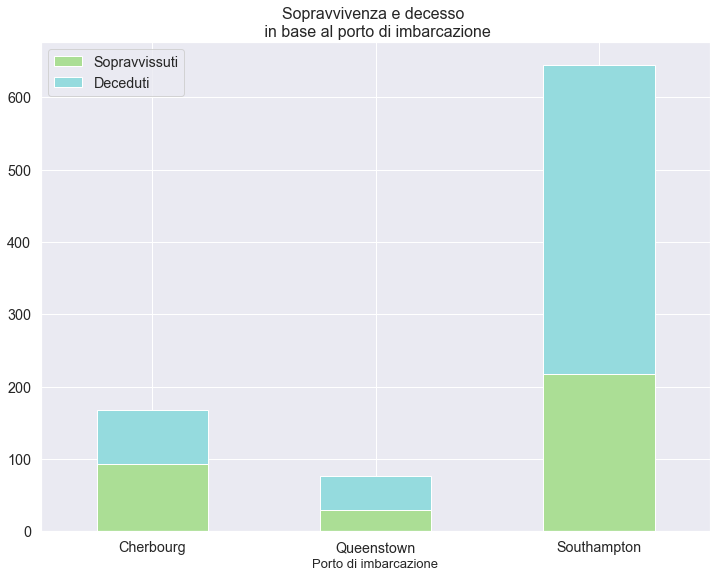

In [67]:
dfSopravvissutiPorto.plot(kind="bar", x="Porto di imbarcazione", stacked=True,rot=0, color=colors)
plt.title("Sopravvivenza e decesso \n in base al porto di imbarcazione")


plt.show()

### Percentuale di sopravvissuti in base al numero di membri della famiglia a bordo

In [68]:
raggrupMortiFamMembers= morti.groupby(['FamMembers'])['Survived']
dfRagMortiFamMembers = raggrupMortiFamMembers.aggregate(['count'])

raggrupViviFamMembers = vivi.groupby(['FamMembers'])['Survived']
dfRagViviFamMembers = raggrupViviFamMembers.aggregate(['count'])

dfRagMortiFamMembers = dfRagMortiFamMembers.rename(columns = {'count': 'Deceduti'})

dfRagViviFamMembers = dfRagViviFamMembers.rename(columns = {'count': 'Sopravvissuti'})

dfSopravvissutiFamMembers = pd.merge(dfRagViviFamMembers, dfRagMortiFamMembers,on="FamMembers")
dfSopravvissutiFamMembers = dfSopravvissutiFamMembers.reset_index(level='FamMembers')

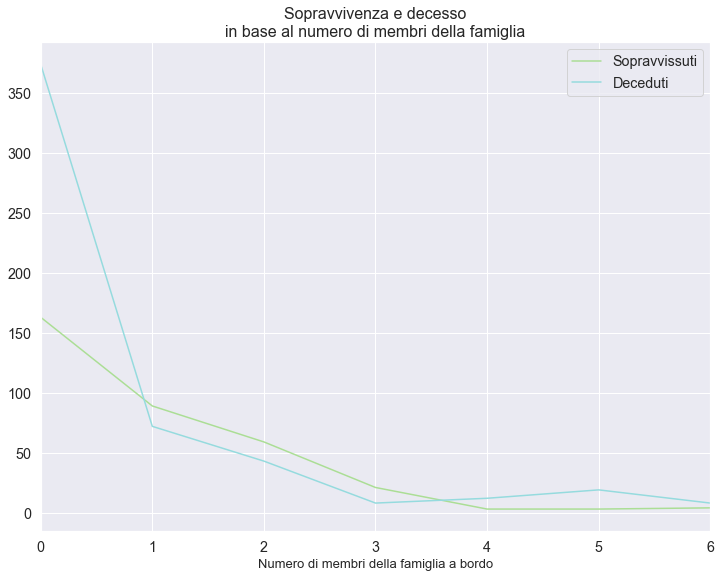

In [69]:
dfSopravvissutiFamMembers.plot(x="FamMembers", y = ["Sopravvissuti", "Deceduti"], color = colors)
plt.title("Sopravvivenza e decesso\nin base al numero di membri della famiglia")
plt.xlabel("Numero di membri della famiglia a bordo")
plt.xlim(left=0,right=6)

plt.show()

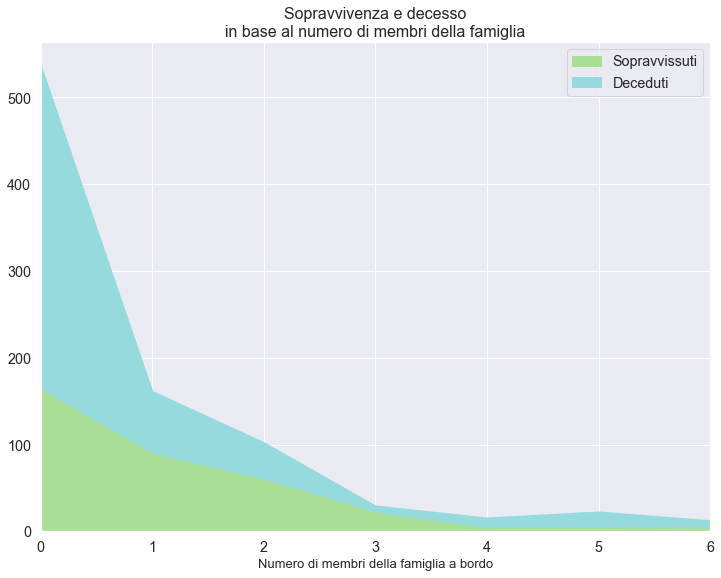

In [70]:
# grafico stacked area che permette un confronto più chiaro

dfSopravvissutiFamMembers.plot(kind="area",x="FamMembers", y = ["Sopravvissuti", "Deceduti"], color = colors)
plt.title("Sopravvivenza e decesso\nin base al numero di membri della famiglia")
plt.xlabel("Numero di membri della famiglia a bordo")
plt.xlim(left=0,right=6)

plt.show()

### Percentuale di sopravvissuti in base all'età

In [71]:
raggrupMortiEtà = morti.groupby(['Age'])['Survived']
dfRagMortiEtà = raggrupMortiEtà.aggregate(['count'])

raggrupViviEtà = vivi.groupby(['Age'])['Survived']
dfRagViviEtà = raggrupViviEtà.aggregate(['count'])

dfRagMortiEtà = dfRagMortiEtà.rename(columns = {'count': 'Deceduti'})

dfRagViviEtà = dfRagViviEtà.rename(columns = {'count': 'Sopravvissuti'})

dfSopravvissutiEtà = pd.merge(dfRagViviEtà, dfRagMortiEtà,on="Age")
dfSopravvissutiEtà = dfSopravvissutiEtà.reset_index(level='Age')

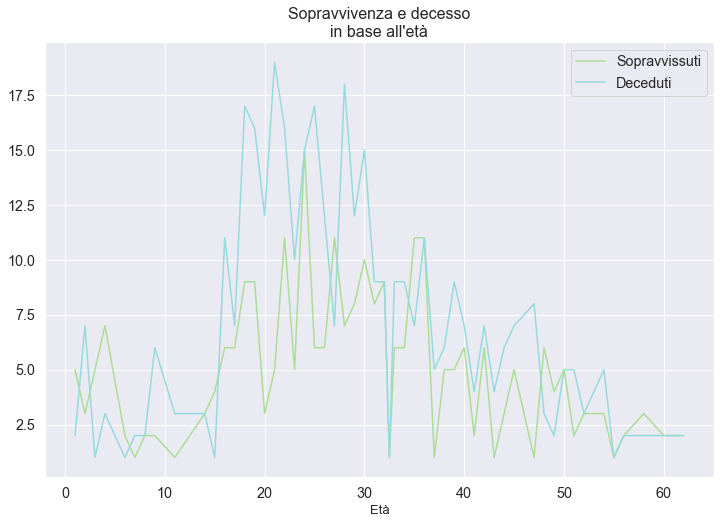

In [72]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set_style("darkgrid")
dfSopravvissutiEtà.plot(x="Age", y = ["Sopravvissuti", "Deceduti"], color = [colors[0], colors[1]])
plt.title("Sopravvivenza e decesso\nin base all'età")
plt.xlabel("Età")

plt.show()

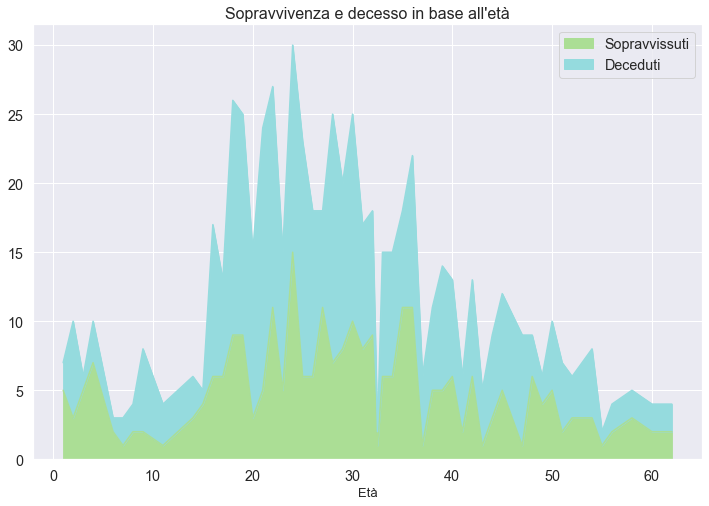

In [73]:
dfSopravvissutiEtà.plot(kind="area",x="Age", y = ["Sopravvissuti", "Deceduti"], color = [colors[0], colors[1]])
plt.title("Sopravvivenza e decesso in base all'età")
plt.xlabel("Età")

plt.show()

### Percentuale di sopravvissuti in base al sesso

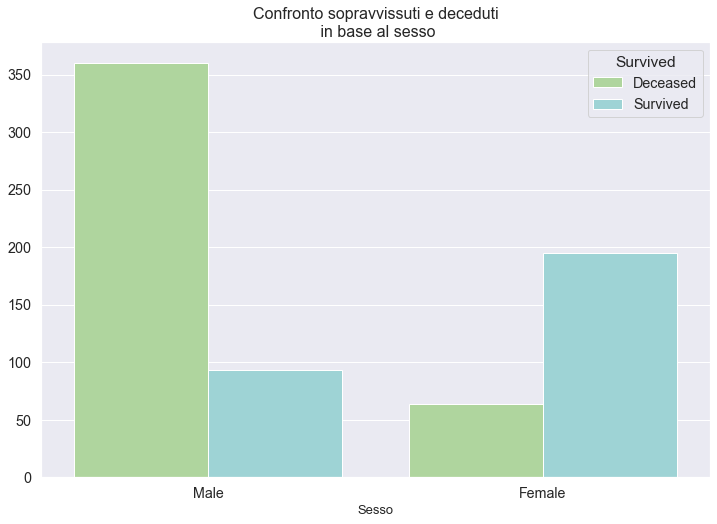

In [74]:
# metodo alternativo per la creazione del grafico, usando direttamente countplot, che fa sia counting che plotting

sns.countplot(data=titanic_nc_clean, x='Sex', hue='Survived', palette = colors).set_title('Confronto sopravvissuti e deceduti\n in base al sesso')
plt.ylabel("")
plt.xlabel("Sesso")

plt.show()

In [75]:
raggrupMortiSesso = morti.groupby(['Sex'])['Survived']
dfRagMortiSesso = raggrupMortiSesso.aggregate(['count'])
dfRagMortiSesso.head()

raggrupViviSesso = vivi.groupby(['Sex'])['Survived']
dfRagViviSesso = raggrupViviSesso.aggregate(['count'])

dfRagMortiSesso = dfRagMortiSesso.rename(columns = {'count': 'Deceduti'})
dfRagMortiSesso.insert(0, "Sex", ["Female", "Male"])
dfRagMortiSesso.reset_index(drop=True, inplace=True)

dfRagViviSesso = dfRagViviSesso.rename(columns = {'count': 'Sopravvissuti'})
dfRagViviSesso.insert(0, "Sex", ["Female", "Male"])
dfRagViviSesso.reset_index(drop=True, inplace=True)

dfSopravvissutiSesso = pd.merge(dfRagViviSesso, dfRagMortiSesso,on="Sex")
dfSopravvissutiSesso.head()

,Sex,Sopravvissuti,Deceduti
0,Female,233,81
1,Male,109,468


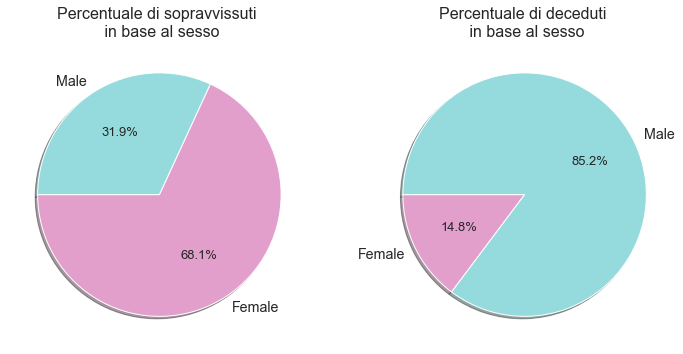

In [76]:
plt.subplot(1,2,1)
plt.title("Percentuale di sopravvissuti \n in base al sesso")
sizes = dfSopravvissutiSesso['Sopravvissuti']
labels = dfSopravvissutiSesso['Sex']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors=[colors[2],colors[1]])

plt.subplot(1,2,2)
plt.title("Percentuale di deceduti \n in base al sesso")
sizes = dfSopravvissutiSesso['Deceduti']
labels = dfSopravvissutiSesso['Sex']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180, colors=[colors[2],colors[1]])


plt.show()

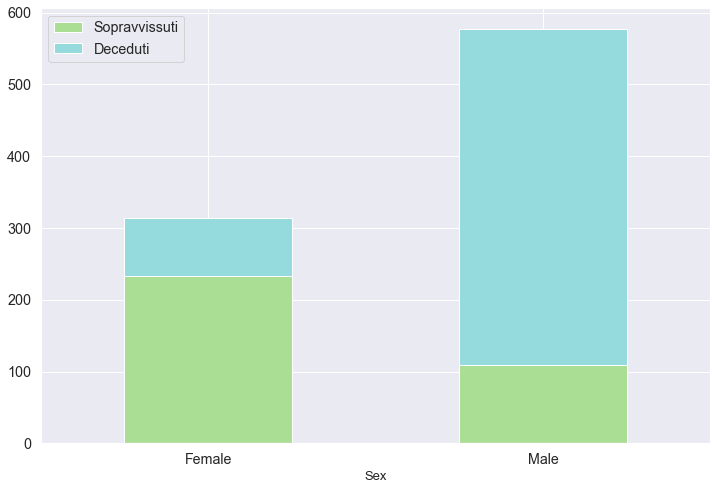

In [77]:
dfSopravvissutiSesso.plot(kind="bar", x="Sex", stacked=True,rot=0, color=colors)

plt.show()

### Rapporto fra sesso ed età

In [78]:
# confronto numerico

titanic_nc_clean[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
Female,27.745174
Male,30.726645


In [79]:
# cfr i valori coi boxplot successivi

NORMAL_Age[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
Female,27.915709
Male,29.754910


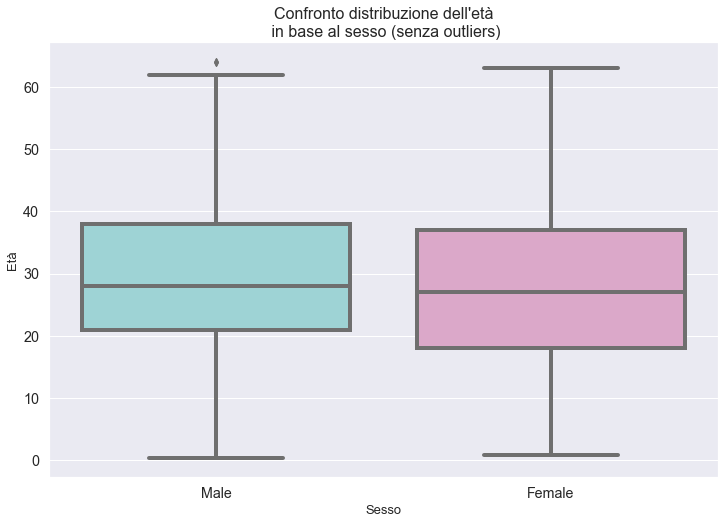

In [80]:
# no outliers

sns.boxplot(x='Sex',y='Age',data=NORMAL_Age, palette = [colors[1], colors[2]], linewidth=4)
plt.title("Confronto distribuzione dell'età\n in base al sesso (senza outliers)")
plt.xlabel("Sesso")
plt.ylabel("Età")
plt.show()

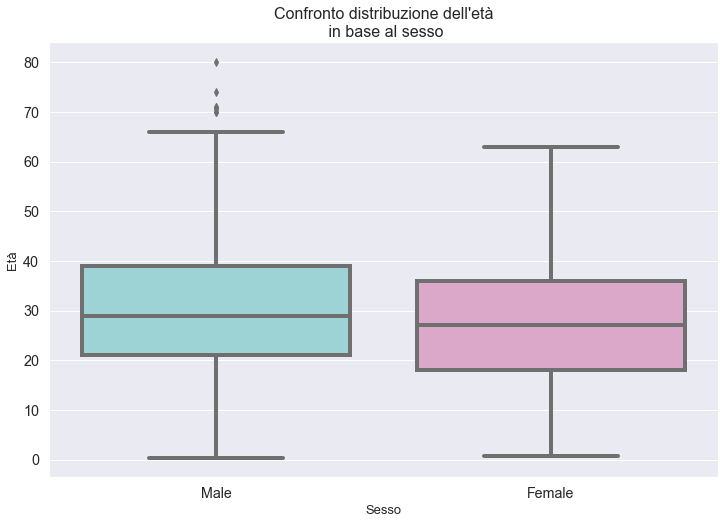

In [81]:
# con outliers

sns.boxplot(x='Sex',y='Age',data=titanic_nc_clean, palette = [colors[1], colors[2]], linewidth=4)
plt.title("Confronto distribuzione dell'età\n in base al sesso")
plt.xlabel("Sesso")
plt.ylabel("Età")
plt.show()

### Rapporto fra classe di viaggio e porto di partenza

In [82]:
# creazione di una copia del df ordinato in base alla classe (First > Second > Third)
# utile per le visualizzazioni a seguire

titanic_PC_ordered=titanic_nc.sort_values(by=['Pclass'])

In [83]:
firstClass = titanic_nc.loc[titanic_nc['Pclass'].isin(["First Class"])]
secondClass = titanic_nc.loc[titanic_nc['Pclass'].isin(["Second Class"])]
thirdClass = titanic_nc.loc[titanic_nc['Pclass'].isin(["Third Class"])]

raggrupFirstClass = firstClass.groupby(['Embarked'])['Pclass']
dfRagFirstClass = raggrupFirstClass.aggregate(['count'])
dfRagFirstClass.head(10) 

raggrupSecondClass = secondClass.groupby(['Embarked'])['Pclass']
dfRagSecondClass = raggrupSecondClass.aggregate(['count'])

raggrupThirdClass = thirdClass.groupby(['Embarked'])['Pclass']
dfRagThirdClass = raggrupThirdClass.aggregate(['count'])

# essendo tre colonne, il merge avviene gradualmente fra coppie di sotto-df
dfEmbarkedClass = pd.merge(dfRagFirstClass, dfRagSecondClass, on="Embarked")
dfEmbarkedClass = pd.merge(dfEmbarkedClass, dfRagThirdClass, on="Embarked")
dfEmbarkedClass = dfEmbarkedClass.rename(columns = {'count_x': 'First Class', 'count_y':'Second Class', 'count': 'Third Class'})

# reset dell'index così Embarked diventa una vera e propria colonna del df
dfEmbarkedClass = dfEmbarkedClass.reset_index(level='Embarked')
dfEmbarkedClass.head()

,Embarked,First Class,Second Class,Third Class
0,Cherbourg,85,17,66
1,Queenstown,2,3,72
2,Southampton,127,164,353


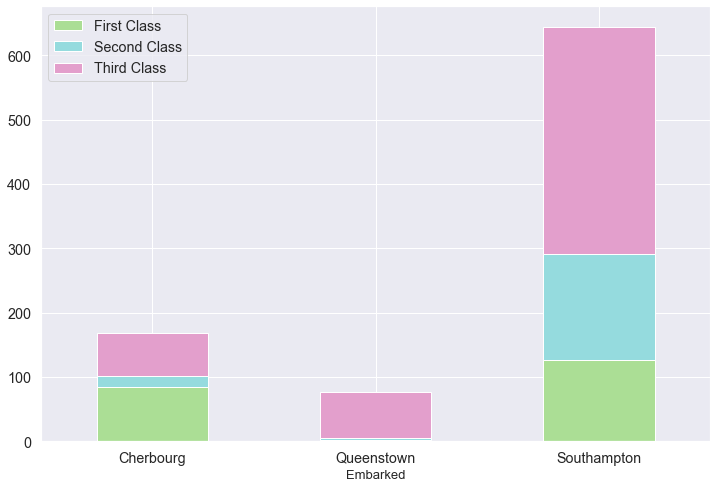

In [84]:
dfEmbarkedClass.plot(kind="bar", x="Embarked", stacked=True,rot=0, color=colors)
plt.show()

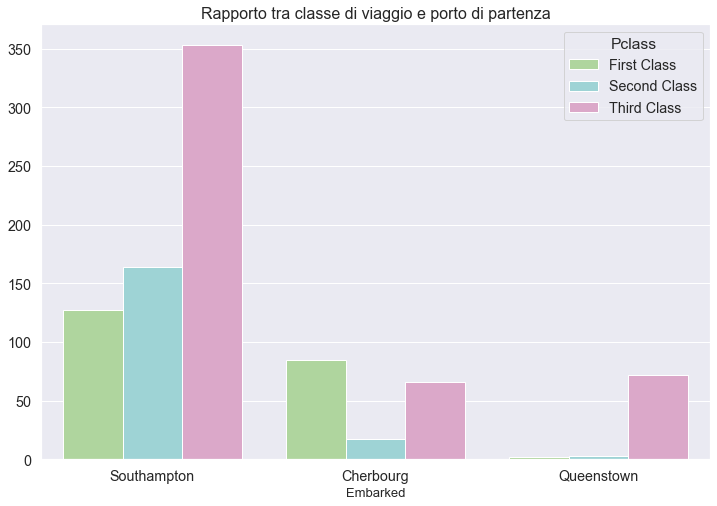

In [85]:
sns.countplot(data=titanic_PC_ordered, x='Embarked', hue='Pclass', palette = colors).set_title('Rapporto tra classe di viaggio e porto di partenza')
plt.ylabel("")
plt.show()

### Rapporto fra classe di viaggio ed età

In [86]:
# confronto numerico

titanic_nc_clean[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
First Class,38.105543
Second Class,29.877630
Third Class,25.140620


In [87]:
NORMAL_Age[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
First Class,37.163444
Second Class,29.431754
Third Class,24.759716


In [88]:
# stesso riordinamento di prima, ma fatto su NORMAL_Age (anche in questo caso per la visualizzazione grafica)

NORMAL_Age_ordered=NORMAL_Age.sort_values(by=['Pclass'])

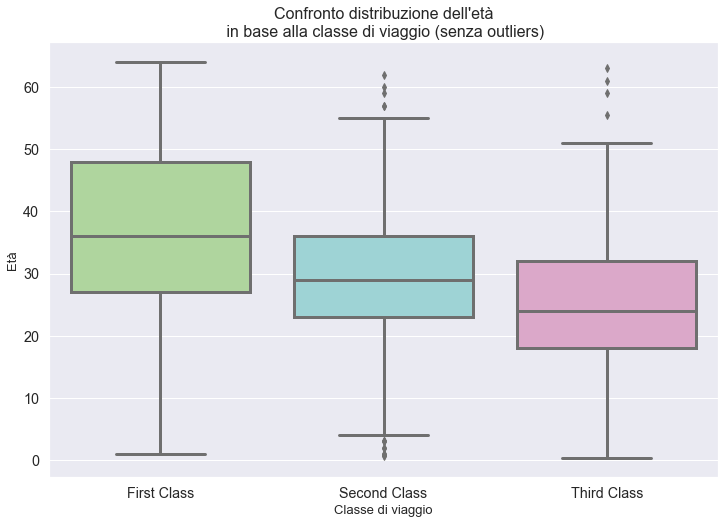

In [89]:
sns.boxplot(x='Pclass',y='Age',data=NORMAL_Age_ordered, palette = colors, linewidth=3)
plt.title("Confronto distribuzione dell'età\n in base alla classe di viaggio (senza outliers)")
plt.xlabel("Classe di viaggio")
plt.ylabel("Età")
plt.show ()

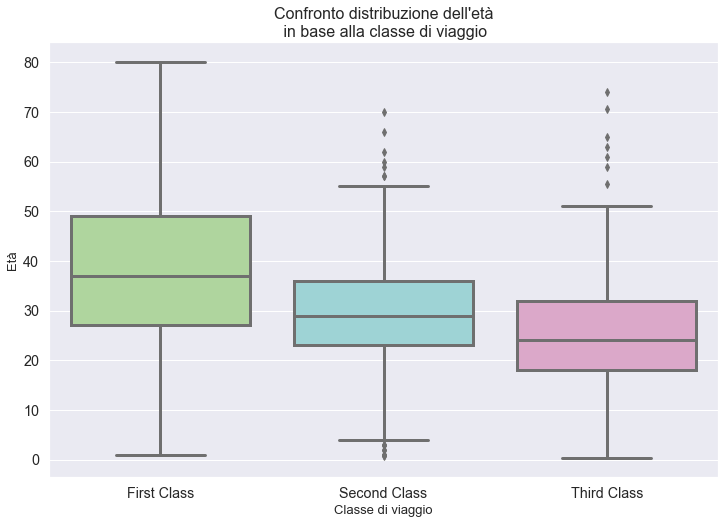

In [90]:
sns.boxplot(x='Pclass',y='Age',data=titanic_PC_ordered, palette = colors, linewidth=3)
plt.title("Confronto distribuzione dell'età\n in base alla classe di viaggio")
plt.xlabel("Classe di viaggio")
plt.ylabel("Età")
plt.show()

### Recap: classe, età e sesso

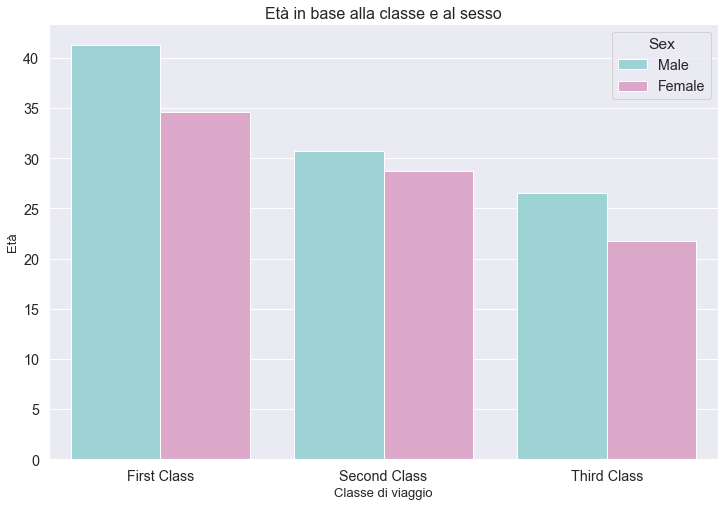

In [91]:
sns.barplot(x="Pclass", y="Age",hue="Sex", data=titanic_PC_ordered, ci=None, palette=[colors[1],colors[2]])
plt.title("Età in base alla classe e al sesso")
plt.xlabel("Classe di viaggio")
plt.ylabel("Età")
plt.show()

### Rapporto fra classe di viaggio e costo del biglietto

In [92]:
Q1 = titanic_PC_ordered['Fare'].quantile(0.25, interpolation='linear')
Q3 = titanic_PC_ordered['Fare'].quantile(0.75, interpolation='linear')
IQR = Q3-Q1
Lowerfence = Q1 - 1.5*IQR
Upperfence = Q3 + 1.5*IQR
NORMAL_Fare_ordered = titanic_PC_ordered.loc[(titanic_PC_ordered['Fare'] > Lowerfence)  & (titanic_PC_ordered['Fare'] < Upperfence)]

In [93]:
# confronto numerico

titanic_PC_ordered[['Pclass','Fare']].groupby('Pclass').mean()

,Fare
Pclass,
First Class,84.154687
Second Class,20.662183
Third Class,13.675550


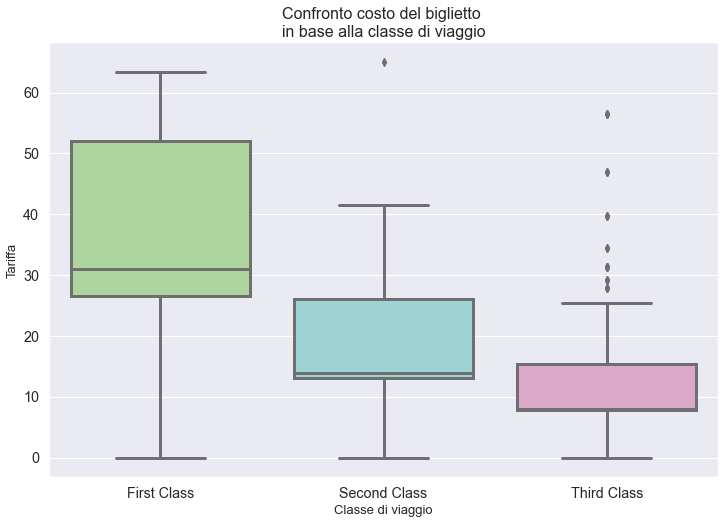

In [94]:
# in questo caso è stato plottato solo il grafico senza outliers perché quello con era poco informativo
# a causa dell'altissimo numero di outliers in Fare

sns.boxplot(x='Pclass',y='Fare',data=NORMAL_Fare_ordered, palette = colors, linewidth=3)
plt.title("Confronto costo del biglietto \nin base alla classe di viaggio")
plt.xlabel("Classe di viaggio")
plt.ylabel("Tariffa")
plt.show()

# 2. Correlazione

## Controllo della normalità per le variabili Age e Fare

### Age

In [95]:
# calcolo di skewness e kurtosis

skew_Age = titanic_nc_clean['Age'].skew()
kurtosis_Age = titanic_nc_clean['Age'].kurt()

In [96]:
print("Skewness: ", skew_Age)
print("L'indice di curtosi è: ", round(kurtosis_Age,2))

Skewness:  0.38888061787537076
L'indice di curtosi è:  0.19


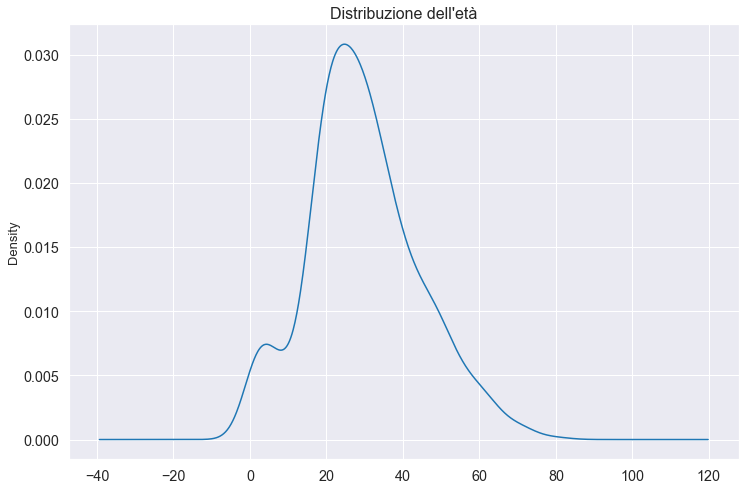

In [97]:
# visualizzazione grafica per verifica della normalità della distribuzione

titanic_nc_clean['Age'].plot.kde()
plt.title("Distribuzione dell'età")
plt.show()

### Fare

In [98]:
skew_Fare = titanic_nc_clean['Fare'].skew()
kurtosis_Fare = titanic_nc_clean['Fare'].kurt()

In [99]:
print("Skewness: ", skew_Fare)
print("L'indice di curtosi è: ", round(kurtosis_Fare,2))

Skewness:  4.667008753630038
L'indice di curtosi è:  31.01


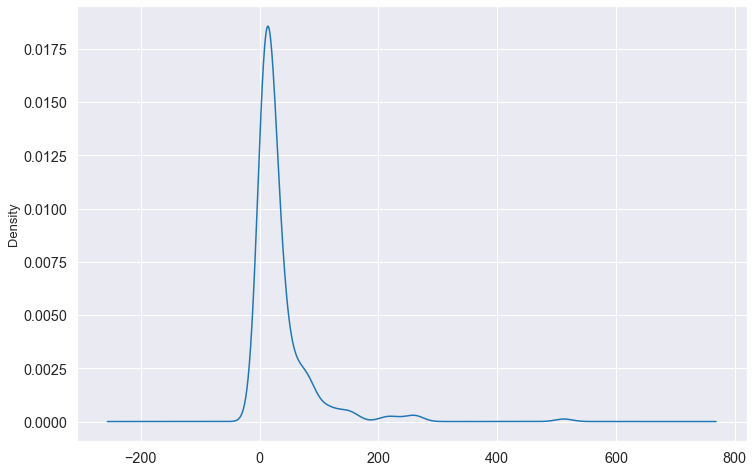

In [100]:
titanic_nc_clean['Fare'].plot.kde()
plt.show()

### FamMembers

In [101]:
skew_FamMembers = titanic_nc_clean['FamMembers'].skew()
kurtosis_FamMembers = titanic_nc_clean['FamMembers'].kurt()

In [102]:
print("Skewness:", skew_FamMembers)
print("L'indice di curtosi è: ", round(kurtosis_FamMembers,2))

Skewness: 2.0065807691980524
L'indice di curtosi è:  3.9


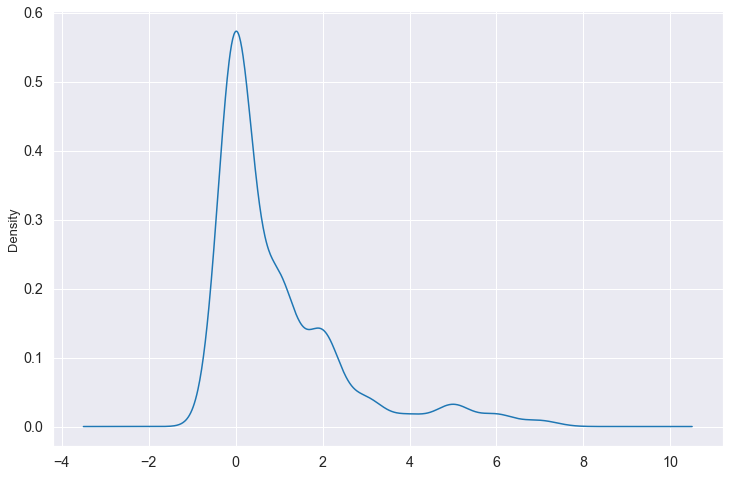

In [103]:
titanic_nc_clean['FamMembers'].plot.kde()
plt.show()

## Correlazione fra le variabili

In [104]:
# dataset pulito da usare per heatmap (con outliers)
# le sostituzioni mirano a rendere i valori numerici

titanic_corr = titanic_nc_clean.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Age (Z)','FamMembers (Z)', 'Fare (Z)'], axis = 1)
titanic_corr['Embarked'] = titanic_corr['Embarked'].replace(['Southampton', 'Cherbourg', 'Queenstown'], [1, 2,3])
titanic_corr['Sex'] = titanic_corr['Sex'].replace(['Female', 'Male'], [0, 1])
titanic_corr['Survived'] = titanic_corr['Survived'].replace(['Deceased', 'Survived'], [0, 1])
titanic_corr['Pclass'] = titanic_corr['Pclass'].replace(['First Class', 'Second Class', 'Third Class'], [1, 2, 3])
titanic_corr

,Survived,Pclass,Sex,Age,FamMembers,Fare,Embarked
0,0,3,1,22.0,1,7.2500,1
1,1,1,0,38.0,1,71.2833,2
2,1,3,0,26.0,0,7.9250,1
3,1,1,0,35.0,1,53.1000,1
4,0,3,1,35.0,0,8.0500,1
...,...,...,...,...,...,...,...
885,0,3,0,39.0,5,29.1250,3
886,0,2,1,27.0,0,13.0000,1
887,1,1,0,19.0,0,30.0000,1
889,1,1,1,26.0,0,30.0000,2


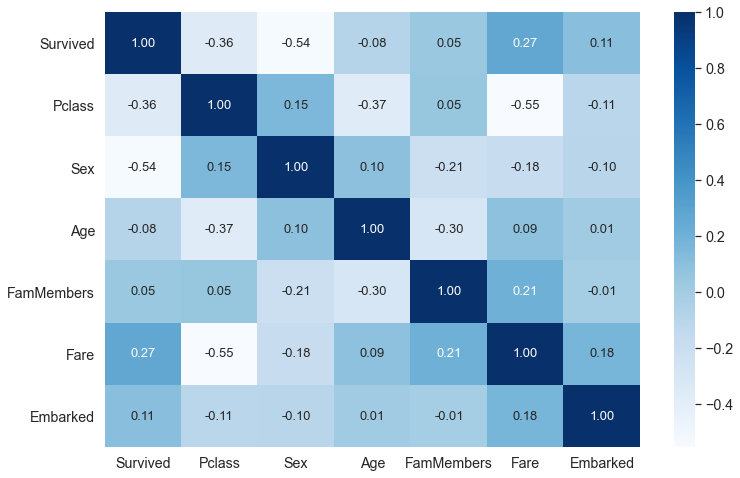

In [105]:
sns.heatmap(titanic_corr.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

In [106]:
# dataset da usare per heatmap senza outliers

titanic_corr2 = titanic_corr[(titanic_corr['Age'] > LowerfenceAge) & (titanic_corr ['Age'] < UpperfenceAge)] 
titanic_corr2= titanic_corr[(titanic_corr['Fare'] > LowerfenceFare) & (titanic_corr ['Fare'] < UpperfenceFare)]
titanic_corr2= titanic_corr[(titanic_corr['FamMembers'] > LowerfenceFamMembers) & (titanic_corr ['FamMembers'] < UpperfenceFamMembers)]

In [107]:
titanic_corr2

,Survived,Pclass,Sex,Age,FamMembers,Fare,Embarked
0,0,3,1,22.0,1,7.2500,1
1,1,1,0,38.0,1,71.2833,2
2,1,3,0,26.0,0,7.9250,1
3,1,1,0,35.0,1,53.1000,1
4,0,3,1,35.0,0,8.0500,1
...,...,...,...,...,...,...,...
884,0,3,1,25.0,0,7.0500,1
886,0,2,1,27.0,0,13.0000,1
887,1,1,0,19.0,0,30.0000,1
889,1,1,1,26.0,0,30.0000,2


In [108]:
titanic_corr2.corr("spearman")

,Survived,Pclass,Sex,Age,FamMembers,Fare,Embarked
Survived,1.000000,-0.344198,-0.565610,-0.070327,0.230511,0.376902,0.149460
Pclass,-0.344198,1.000000,0.179147,-0.368516,-0.192293,-0.809369,-0.176464
Sex,-0.565610,0.179147,1.000000,0.087366,-0.248440,-0.268016,-0.123412
Age,-0.070327,-0.368516,0.087366,1.000000,-0.086034,0.239863,0.017734
FamMembers,0.230511,-0.192293,-0.248440,-0.086034,1.000000,0.466244,0.079561
Fare,0.376902,-0.809369,-0.268016,0.239863,0.466244,1.000000,0.179893
Embarked,0.149460,-0.176464,-0.123412,0.017734,0.079561,0.179893,1.000000


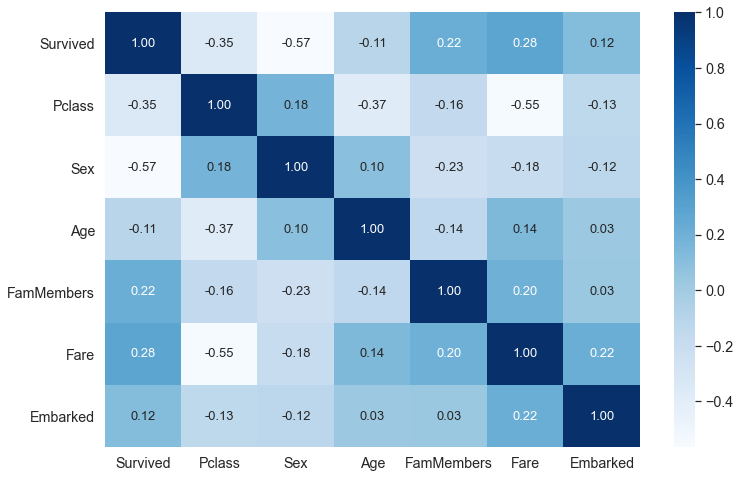

In [109]:
# con pearson: indice non adatto data la non-normalità

sns.heatmap(titanic_corr2.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

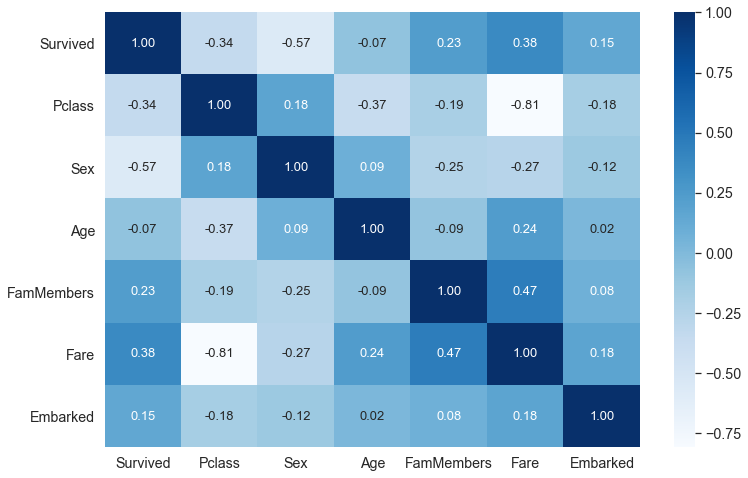

In [110]:
# con spearman: indice più adatto

sns.heatmap(titanic_corr2.corr(method="spearman"), annot=True, fmt=".2f", cmap="Blues")
plt.show()

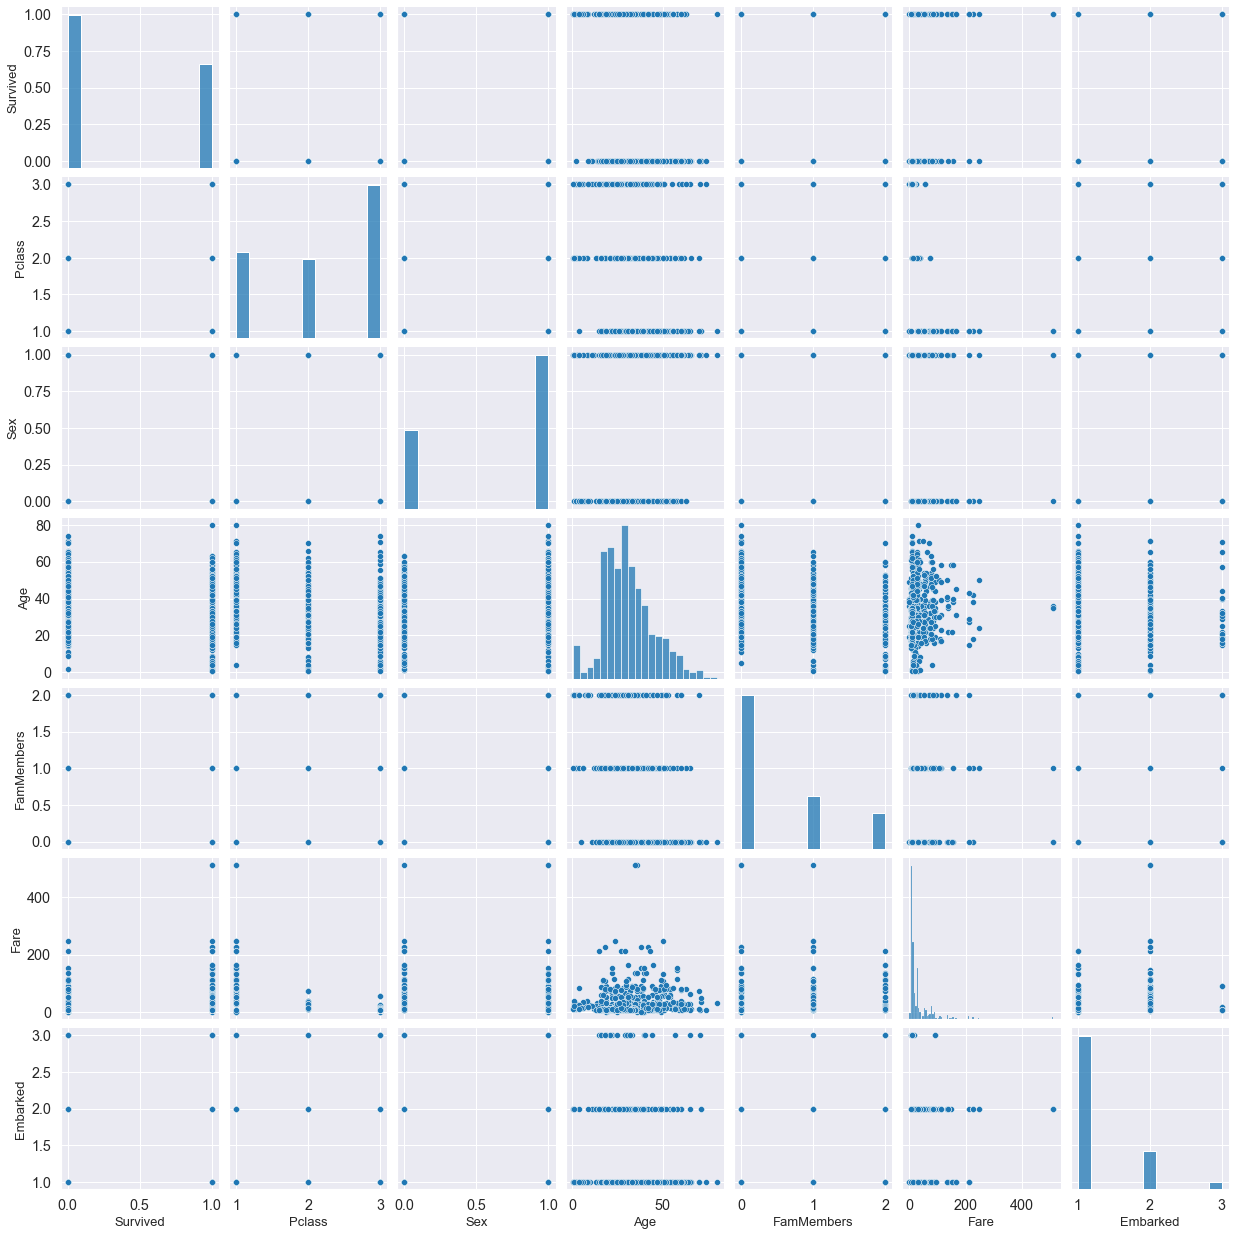

In [111]:
# pairplot molto poco significativo
# l'unica relazione minimamente significativa è ripresa in uno scatterplot apposito

sns.pairplot(titanic_corr2)
plt.show()

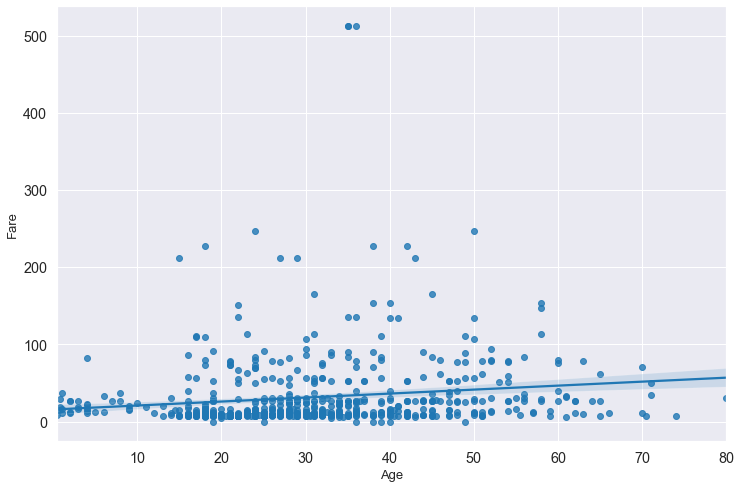

In [112]:
# regressione lineare con età e costo del biglietto

sns.regplot(x="Age", y="Fare", fit_reg=True, data=titanic_corr2)
plt.show()

### Appendice: Grafici interattivi

Di seguito si riportano alcuni grafici interattivi, generati utilizzando le librerie Plotly e Cufflinks, in aggiunta a quelli presentati nel resto del Notebook.<br>I grafici riguardano la sopravvivenza e il decesso in base alla cabina e in base all'età. Infine è presentata di seguito anche l'heatmap che evidenzia la correlazione delle diverse variabili.

In [113]:
dfSopravvissutiCabina.iplot(kind = 'bar', barmode='stack', bargap=0.5, x = 'Cabin', color = colors, title = "Sopravvivenza e decesso\nin base alla cabina")

In [114]:
dfSopravvissutiEtà.iplot(x="Age", y = ["Sopravvissuti", "Deceduti"], mode = 'markers', size = 25, title="Sopravvivenza e decesso in base all'età", xTitle='Età', yTitle='Numero sopravvissuti/deceduti', color=colors)

In [115]:
dfSopravvissutiEtà.iplot(kind = 'area', fill = True, x="Age", y = ["Sopravvissuti", "Deceduti"], title="Sopravvivenza e decesso in base all'età", xTitle='Età', yTitle='Numero sopravvissuti/deceduti', color=colors)

In [117]:
titanic_corr.corr().iplot(kind = 'heatmap', colorscale="Blues", title = "Correlazione fra le variabili")